Pour l'analyse de 3 élèments de symétrie, j'ai utilisé la maille conventionnelle car celles-ci me permet de travailler avec un maximum de sites.


1) Plan miroir
Tout d'abord, l'analyse de la réflexion d'un atome de K avec comme position initiale : [0.25 0.25 0.25]
L'atome passe ensuite à la position : [0.25 0.25 0.25]
Les opérations de symétries sont associées à des opérateurs qui sont des matrices othogonales (M^T=M^(-1)) d'ordre 3 agissant sur les coordonnées cartésiennes d'un point pour en donner l'image.
L'ancienne et la nouvelle position de l'atome sont alors liées par la relation : M * x_init = x_final
Dans ce cas l'opérateur de réflexion est M : [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
L'opérateur de réflexion inverse la chiralité et le déterminant vaut -1. C'est une opération de deuxième espèce.




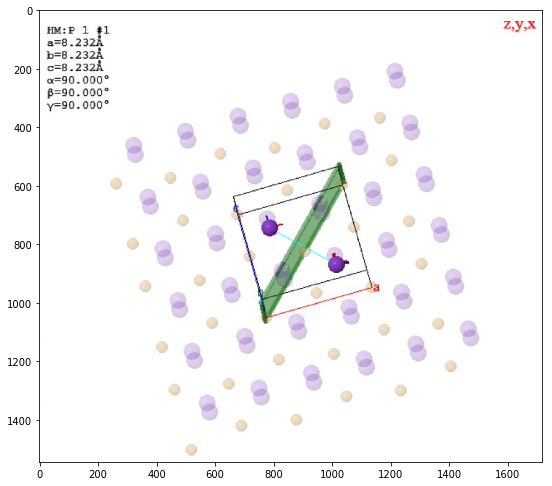

2) Rotation d'ordre 4
Ensuite, l'analyse de la rotation d'un atome de K avec comme position initiale : [0.75 0.25 0.75]
L'atome passe ensuite à la position : [ 0.75  0.75 -0.25]
Dans ce cas l'opérateur de rotation est M : [[1, 0, 0], [0, 0, 1], [0, -1, 0]]
L'opérateur de rotation n'inverse pas la chiralité et le déterminant vaut 1. C'est une opération de première espèce.




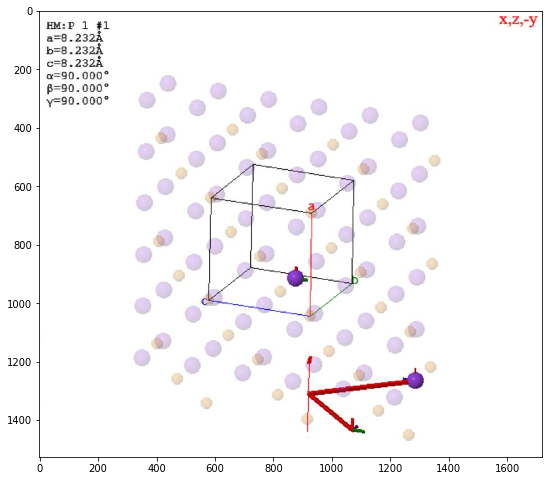

2) Rotation hélicoïdale d'ordre 2
Enfin, l'analyse de la rotation d'un atome de Te avec comme position initiale : [0. 0. 0.]
L'atome passe ensuite à la position : [0.5 0.5 0. ]
Dans ce cas l'opérateur de rotation est M : [[0, 0, -1], [0, -1, 0], [-1, 0, 0]] + [0.5, 0.5, 0]
L'opérateur de rotation hélicoïdale est une opération non-symorphique car elle possède une composante de transaltion. La molécule subit d'abord une rotation suivie d'une translation.




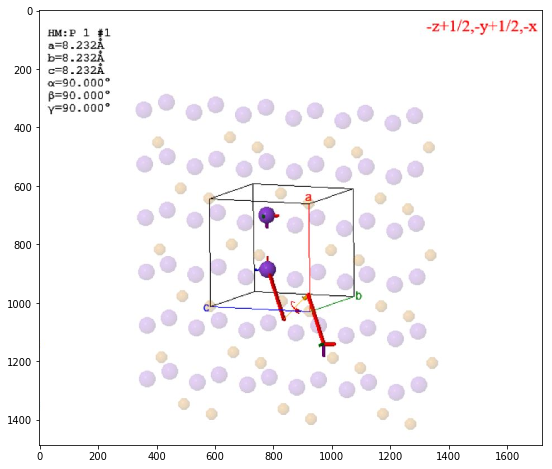

In [36]:
import pymatgen.symmetry.analyzer as analyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
with MPRester("SbN3LIBvkZaEmT4M") as m:
    material_id = "mp-1747"
    # Structure for material id
    structure = m.get_structure_by_material_id(material_id)
    new_structure = analyzer.SpacegroupAnalyzer(structure).get_conventional_standard_structure()
    site = new_structure.sites
    
    print("Pour l'analyse de 3 élèments de symétrie, j'ai utilisé la maille conventionnelle car celles-ci me permet de travailler avec un maximum de sites.")
    print("\n")
    
    op_sym =SymmOp.from_xyz_string('z,y,x')
    init_position = site[3].frac_coords
    final_position = op_sym.operate(init_position)
    
    
    print("1) Plan miroir")
    print("Tout d'abord, l'analyse de la réflexion d'un atome de K avec comme position initiale :",init_position)
    print("L'atome passe ensuite à la position :",final_position)
    print("Les opérations de symétries sont associées à des opérateurs qui sont des matrices othogonales (M^T=M^(-1)) d'ordre 3 agissant sur les coordonnées cartésiennes d'un point pour en donner l'image.")
    print("L'ancienne et la nouvelle position de l'atome sont alors liées par la relation : M * x_init = x_final")
    M=[[0,0,1],[0,1,0],[1,0,0]]
    print("Dans ce cas l'opérateur de réflexion est M :",M)
    print("L'opérateur de réflexion inverse la chiralité et le déterminant vaut -1. C'est une opération de deuxième espèce.")
    print("\n")
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('10mirror.PNG'))
    plt.show()
    
    op_sym =SymmOp.from_xyz_string('x,z,-y')
    init_position = site[7].frac_coords
    final_position = op_sym.operate(init_position)    
    
    print("2) Rotation d'ordre 4")
    print("Ensuite, l'analyse de la rotation d'un atome de K avec comme position initiale :",init_position)
    print("L'atome passe ensuite à la position :",final_position)
    M=[[1,0,0],[0,0,1],[0,-1,0]]
    print("Dans ce cas l'opérateur de rotation est M :",M)
    print("L'opérateur de rotation n'inverse pas la chiralité et le déterminant vaut 1. C'est une opération de première espèce.")
    print("\n")
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('20 rotation.PNG'))
    plt.show()
    
    op_sym =SymmOp.from_xyz_string('-z+1/2,-y+1/2,-x')
    init_position = site[8].frac_coords
    final_position = op_sym.operate(init_position)
    
    print("2) Rotation hélicoïdale d'ordre 2")
    print("Enfin, l'analyse de la rotation d'un atome de Te avec comme position initiale :",init_position)
    print("L'atome passe ensuite à la position :",final_position)
    M=[[0,0,-1],[0,-1,0],[-1,0,0]]
    print("Dans ce cas l'opérateur de rotation est M :",M,"+",[0.5,0.5,0])
    print("L'opérateur de rotation hélicoïdale est une opération non-symorphique car elle possède une composante de transaltion. La molécule subit d'abord une rotation suivie d'une translation.")
    print("\n")
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('30 screw.PNG'))
    plt.show()
    